In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/mariecieslar/Desktop/Schreibtisch - Maries MacBook Air/Bocconi/Semester 1/STATS/Final Project/housing.csv')


# Add a new column for price per square meter, avoiding division by zero or null landsize values
data['Land_price_per_m2'] = data.apply(
    lambda row: row['Price'] / row['Landsize'] if pd.notnull(row['Price']) and pd.notnull(row['Landsize']) and row['Landsize'] > 0 else None,
    axis=1
)

# Display the updated dataset's first few rows to confirm the addition
data[['Price', 'Landsize', 'Land_price_per_m2']].head()


,Price,Landsize,Land_price_per_m2
0,1480000.0,202.0,7326.732673
1,1035000.0,156.0,6634.615385
2,1465000.0,134.0,10932.835821
3,850000.0,94.0,9042.553191
4,1600000.0,120.0,13333.333333


In [6]:
# Add a new column for price per square meter, avoiding division by zero or null landsize values
data['Building_price_per_m2'] = data.apply(
    lambda row: row['Price'] / row['BuildingArea'] if pd.notnull(row['Price']) and pd.notnull(row['BuildingArea']) and row['BuildingArea'] > 0 else None,
    axis=1
)

# Display the updated dataset's first few rows to confirm the addition
data[['Price', 'BuildingArea', 'Building_price_per_m2']].head()

,Price,BuildingArea,Building_price_per_m2
0,1480000.0,NaN,NaN
1,1035000.0,79.0,13101.265823
2,1465000.0,150.0,9766.666667
3,850000.0,NaN,NaN
4,1600000.0,142.0,11267.605634


In [7]:
# Add a new column for price per square meter, avoiding division by zero or null landsize values
data['Building_and_land_price_per_m2'] = data.apply(
    lambda row: row['Price'] / (row['BuildingArea'] + row['Landsize']) if pd.notnull(row['Price']) and pd.notnull(row['Landsize']) and row['Landsize'] > 0 and pd.notnull(row['BuildingArea']) and row['BuildingArea'] > 0 else None,
    axis=1
)

# Display the updated dataset's first few rows to confirm the addition
data[['Price', 'BuildingArea', 'Landsize', 'Building_and_land_price_per_m2']].head()

,Price,BuildingArea,Landsize,Building_and_land_price_per_m2
0,1480000.0,NaN,202.0,NaN
1,1035000.0,79.0,156.0,4404.255319
2,1465000.0,150.0,134.0,5158.450704
3,850000.0,NaN,94.0,NaN
4,1600000.0,142.0,120.0,6106.870229


In [8]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['Date'].head()

0   2016-12-03
1   2016-02-04
2   2017-03-04
3   2017-03-04
4   2016-06-04
Name: Date, dtype: datetime64[ns]

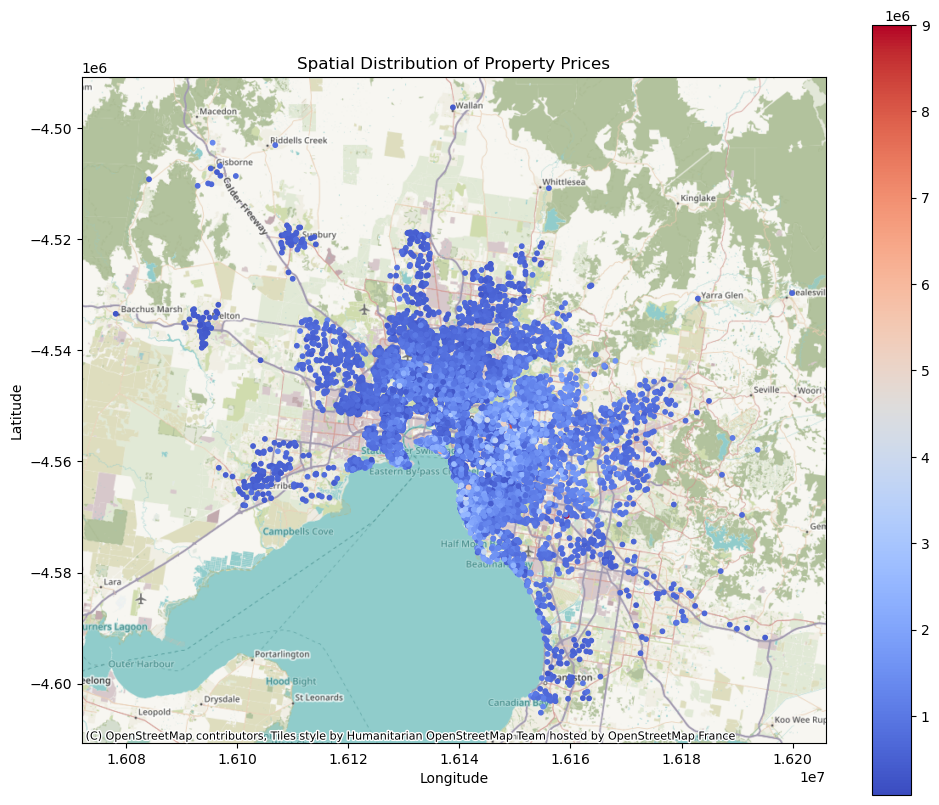

In [9]:
# Spatial Distribution of Property Prices
# Filter valid data for mapping
geo_data = data.dropna(subset=['Lattitude', 'Longtitude', 'Price'])
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Longtitude, geo_data.Lattitude))

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Plot map with prices
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='Price', legend=True, cmap='coolwarm', markersize=10)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Spatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


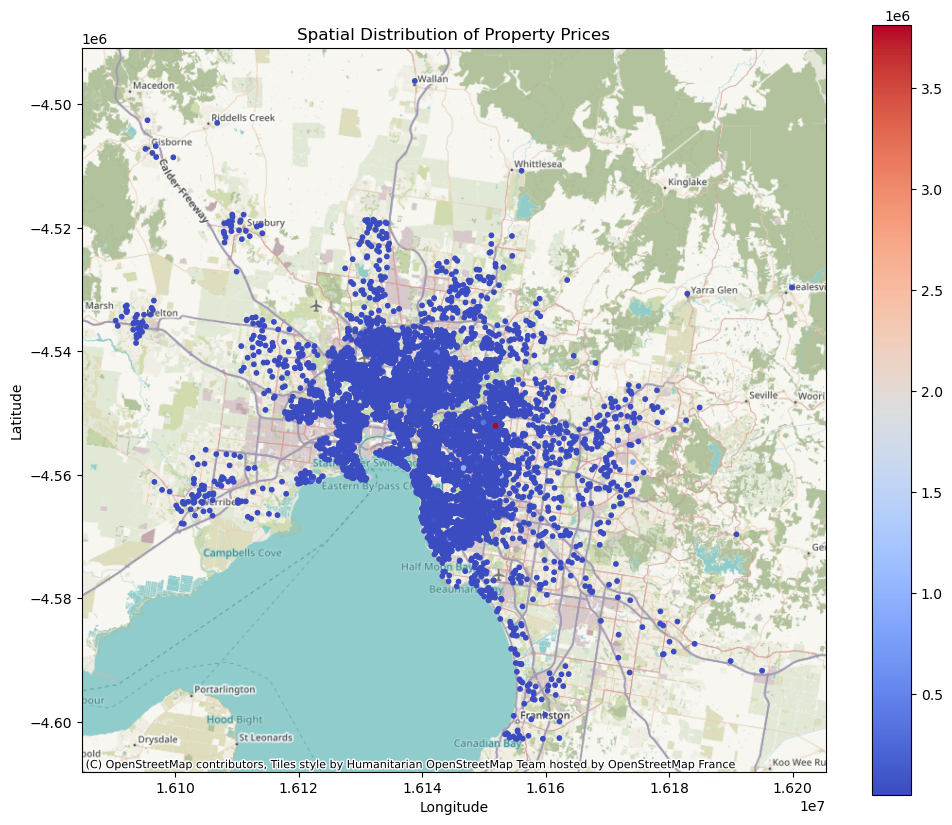

In [10]:
# Spatial Distribution of Property Prices (using Price per sqm (BuildingArea)
# Filter valid data for mapping
geo_data = data.dropna(subset=['Lattitude', 'Longtitude', 'Building_price_per_m2'])
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Longtitude, geo_data.Lattitude))

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Plot map with prices
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='Building_price_per_m2', legend=True, cmap='coolwarm', markersize=10)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Spatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

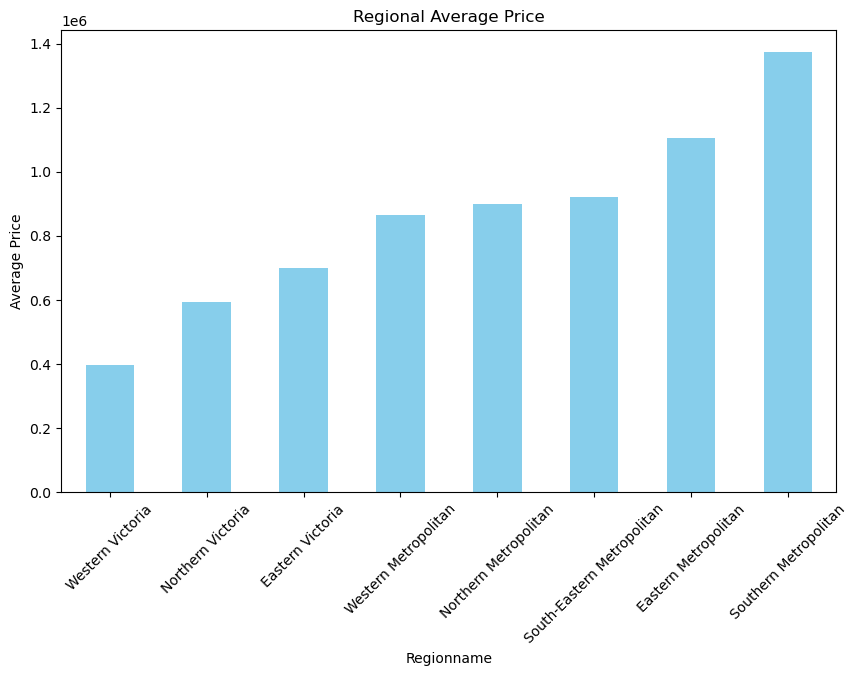

In [12]:
#Regional Price Analysis
# Group by region and calculate mean price per sqm
region_avg = data.groupby('Regionname')['Price'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
region_avg.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price")
plt.title("Regional Average Price")
plt.xticks(rotation=45)
plt.show()


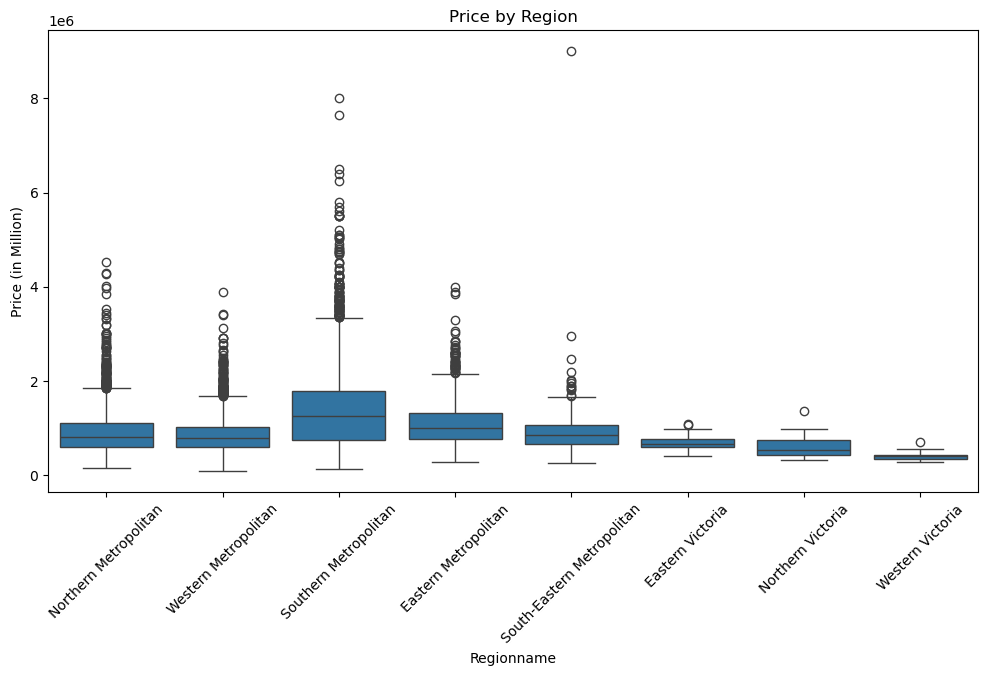

In [14]:
# Boxplots by Regions
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Regionname', y = 'Price', data = data)
plt.xticks(rotation = 45)
plt.title("Price by Region")
plt.ylabel('Price (in Million)')
plt.show()